In [1]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 
library(latex2exp)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand



In [2]:
AA_Sex_1 <- read_sav("C:/Users/Personal/AA leche/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1) 

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,...,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
1,0,17,1,2009-08-20,25,24,24,22,3492.7,...,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,...,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,...,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [3]:
AA_E <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 62:97) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 


names(AA_E)

Warning message:
"`as_dictionary()` is soft-deprecated as of rlang 0.3.0.
Please use `as_data_pronoun()` instead
This warning is displayed once per session."Warning message:
"`new_overscope()` is soft-deprecated as of rlang 0.2.0.
Please use `new_data_mask()` instead
This warning is displayed once per session."Warning message:
"The `parent` argument of `new_data_mask()` is deprecated.
The parent of the data mask is determined from either:

  * The `env` argument of `eval_tidy()`
  * Quosure environments when applicable
This warning is displayed once per session."Warning message:
"`overscope_clean()` is soft-deprecated as of rlang 0.2.0.
This warning is displayed once per session."

[1] "id"            "group"         "age"           "sex"          
 [5] "HISCalostrum"  "HISTransition" "HISMature2m"   "HISMature4m"  
 [9] "ILECalostrum"  "ILETransition" "ILEMature2m"   "ILEMature4m"  
[13] "LEUCalostrum"  "LEUTransition" "LEUMature2m"   "LEUMature4m"  
[17] "LYSCalostrum"  "LYSTransition" "LYSMature2m"   "LYSMature4m"  
[21] "METCalostrum"  "METTransition" "METMature2m"   "METMature4m"  
[25] "PHECalostrum"  "PHETransition" "PHEMature2m"   "PHEMature4m"  
[29] "THRCalostrum"  "THRTransition" "THRMature2m"   "THRMature4m"  
[33] "TRPCalostrum"  "TRPTransition" "TRPMature2m"   "TRPMature4m"  
[37] "VALCalostrum"  "VALTransition" "VALMature2m"   "VALMature4m"

In [4]:
AA_NE <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 58:61, 102:141) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

names(AA_NE)

[1] "id"            "group"         "age"           "sex"          
 [5] "ARGCalostrum"  "ARGTransition" "ARGMature2m"   "ARGMature4m"  
 [9] "ASPCalostrum"  "ASPTransition" "ASPMature2m"   "ASPMature4m"  
[13] "ALACalostrum"  "ALATransition" "ALAMature2m"   "ALAMature4m"  
[17] "ASNCalostrum"  "ASNTransition" "ASNMature2m"   "ASNMature4m"  
[21] "CYSCalostrum"  "CYSTransition" "CYSMature2m"   "CYSMature4m"  
[25] "GLYCalostrum"  "GLYTransition" "GLYMature2m"   "GLYMature4m"  
[29] "GLUCalostrum"  "GLUTransition" "GLUMature2m"   "GLUMature4m"  
[33] "GLNCalostrum"  "GLNTransition" "GLNMature2m"   "GLNMature4m"  
[37] "PROCalostrum"  "PROTransition" "PROMature2m"   "PROMature4m"  
[41] "SERCalostrum"  "SERTransition" "SERMature2m"   "SERMature4m"  
[45] "TYRCalostrum"  "TYRTransition" "TYRMature2m"   "TYRMature4m"

In [5]:
# Removing NAs
AA_E_Long <- AA_E %>% gather(weekNames, level, 5:length(names(AA_E))) 
AA_NE_Long <- AA_NE %>% gather(weekNames, level, 5:length(names(AA_NE))) 

head(AA_E_Long)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,age,sex,weekNames,level
1,teen,17,girl,HISCalostrum,2
2,teen,16,boy,HISCalostrum,1
3,teen,17,boy,HISCalostrum,2
4,teen,16,boy,HISCalostrum,1
5,teen,16,NA,HISCalostrum,1
6,teen,16,boy,HISCalostrum,1


In [6]:
AA_E_Long <- 
    AA_E_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_E_Long <- 
    AA_E_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_E_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,HISCalostrum,2,1,HIS
2,teen,16,boy,HISCalostrum,1,1,HIS
3,teen,17,boy,HISCalostrum,2,1,HIS
4,teen,16,boy,HISCalostrum,1,1,HIS
5,teen,16,NA,HISCalostrum,1,1,HIS
6,teen,16,boy,HISCalostrum,1,1,HIS


In [7]:
AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_NE_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,ARGCalostrum,1,1,ARG
2,teen,16,boy,ARGCalostrum,1,1,ARG
3,teen,17,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGCalostrum,1,1,ARG
5,teen,16,NA,ARGCalostrum,2,1,ARG
6,teen,16,boy,ARGCalostrum,2,1,ARG


## Weight and size of babies

In [8]:
weight <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 10:13) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))

headC <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 14:17) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))


head(weight)

id,group,sex,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g
1,teen,girl,3492.7,3592.5,5488.6,8282.74
2,teen,boy,3392.9,4091.5,5987.5,7883.57
3,teen,boy,2993.8,3592.5,NA,NA
4,teen,boy,3692.3,NA,NA,NA
5,teen,NA,3592.5,NA,NA,NA
6,teen,boy,3093.5,3392.9,4989.6,6785.80


In [100]:
weightLong <- weight %>% gather(weekNames, weight, -id, -group, -sex)
headCLong <- headC %>% gather(weekNames, head, -id, -group, -sex)

weightLong %>% filter(id == 4)
headCLong %>% filter(id == 4)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,sex,weekNames,weight
4,teen,boy,BABYWeigth1g,3692.3
4,teen,boy,BABYWeigth2g,NA
4,teen,boy,BABYWeigth3g,NA
4,teen,boy,BABYWeigth4g,NA


id,group,sex,weekNames,head
4,teen,boy,HeadCircumcm1,37
4,teen,boy,HCcm2,NA
4,teen,boy,HCcm3,NA
4,teen,boy,HCcm4,NA


In [101]:
weightLong <- 
    weightLong %>% 
        mutate(week = gsub(".*1g", "1", weekNames)) %>%
        mutate(week = gsub(".*2g", "2", week)) %>%
        mutate(week = gsub(".*3g", "8", week)) %>%
        mutate(week = gsub(".*4g", "16", week)) %>% 
        mutate(week = as.numeric(week))

weightLong %>% filter(id == 1)

id,group,sex,weekNames,weight,week
1,teen,girl,BABYWeigth1g,3492.70,1
1,teen,girl,BABYWeigth2g,3592.50,2
1,teen,girl,BABYWeigth3g,5488.60,8
1,teen,girl,BABYWeigth4g,8282.74,16


In [102]:
headCLong <- 
    headCLong %>% 
        mutate(week = gsub(".*cm1", "1", weekNames)) %>%
        mutate(week = gsub(".*cm2", "2", week)) %>%
        mutate(week = gsub(".*cm3", "8", week)) %>%
        mutate(week = gsub(".*cm4", "16", week)) %>% 
        mutate(week = as.numeric(week))

headCLong %>% filter(id == 1)

id,group,sex,weekNames,head,week
1,teen,girl,HeadCircumcm1,34,1
1,teen,girl,HCcm2,37,2
1,teen,girl,HCcm3,39,8
1,teen,girl,HCcm4,42,16


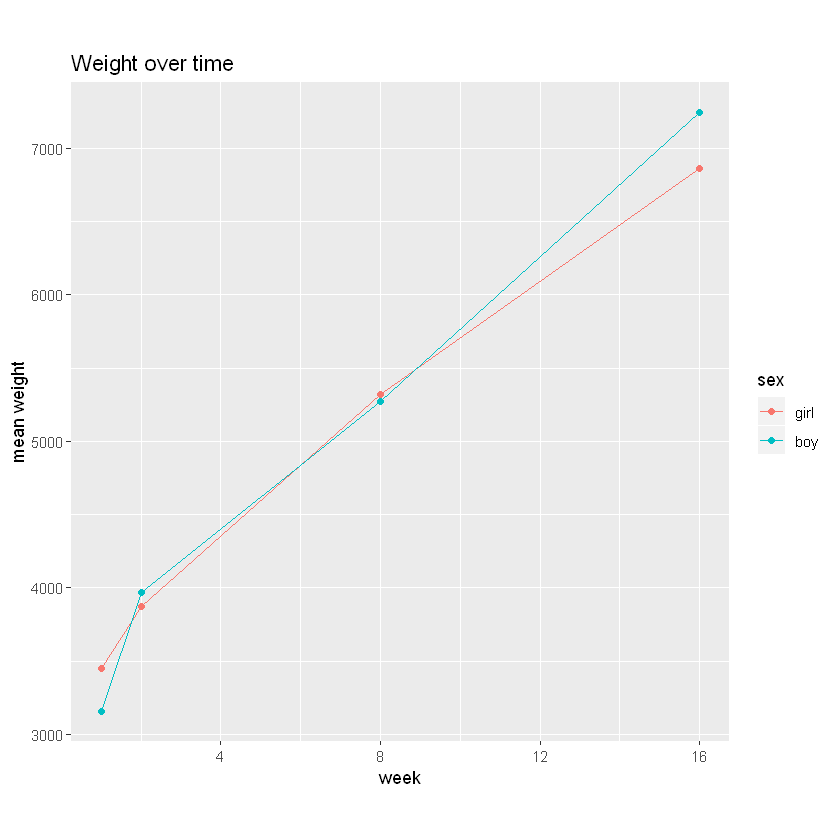

In [103]:
weightDist <- weightLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(weight, na.rm = T), sd = sd(weight, na.rm = T))

#png(filename="./plots/weight.png", units="cm", width=15, height=15, res = 300)
ggplot(weightDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_linerange(aes(ymin = mean - 2*sd, ymax = mean + 2*sd)) + 
    geom_line() + #geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Weight over time') + ylab('mean weight')
#dev.off()

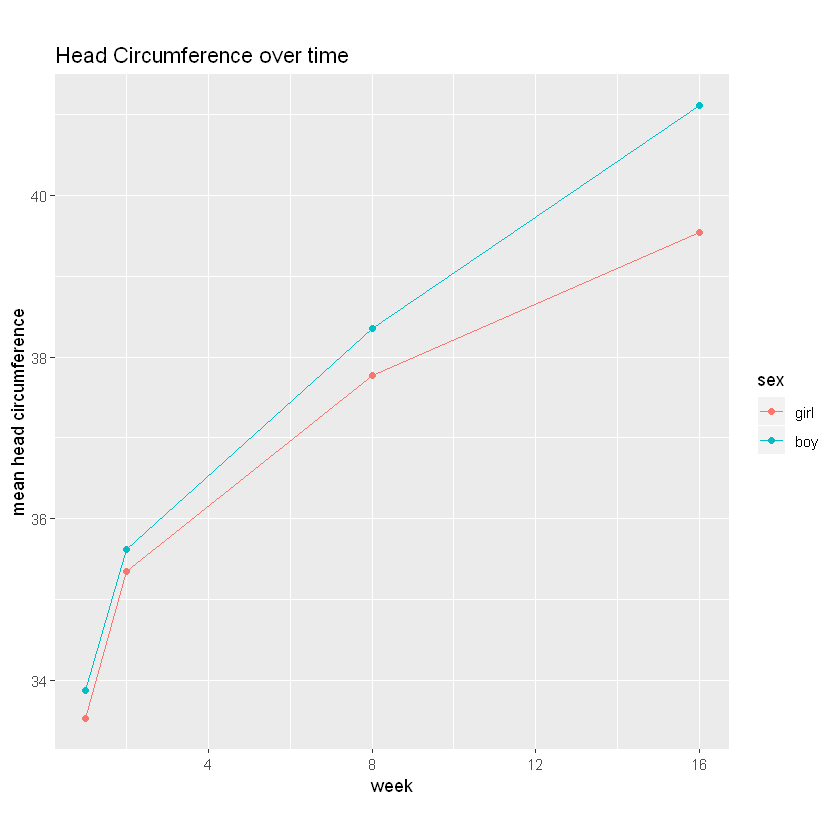

In [104]:
headCDist <- headCLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(head, na.rm = T), sd = sd(head, na.rm = T))

#png(filename="./plots/head_c.png", units="cm", width=15, height=15, res = 300)
ggplot(headCDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_errorbar(aes(ymin = mean - 2*sd, ymax = mean + 2*sd), alpha = 0.5) + 
    geom_line() + #geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Head Circumference over time') + ylab('mean head circumference')
#dev.off()

In [105]:
summary(lm(weightDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = weightDist)

Residuals:
      1       2       3       4       5       6       7       8 
-142.77   58.29  165.70  -81.21 -279.17  276.06   40.34  -37.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3365.70     174.91  19.243  4.3e-05 ***
week          223.54      19.40  11.520 0.000324 ***
sexboy       -185.37     247.35  -0.749 0.495267    
week:sexboy    32.75      27.44   1.194 0.298597    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231.8 on 4 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.9775 
F-statistic: 102.4 on 3 and 4 DF,  p-value: 0.0003084


In [106]:
summary(lm(headCDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = headCDist)

Residuals:
      1       2       3       4       5       6       7       8 
-0.9137  0.5435  0.7621 -0.3919 -0.7740  0.5162  0.5478 -0.2901 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.07687    0.66572  51.188 8.72e-07 ***
week         0.36628    0.07385   4.959  0.00771 ** 
sexboy       0.12198    0.94147   0.130  0.90317    
week:sexboy  0.08387    0.10445   0.803  0.46700    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8824 on 4 degrees of freedom
Multiple R-squared:  0.9403,	Adjusted R-squared:  0.8955 
F-statistic: 20.99 on 3 and 4 DF,  p-value: 0.006556


In [107]:
weight %>% inner_join(headC, by = 'id') %>% select(contains('Weigth'), contains('cm')) %>% cor(use="complete.obs")

,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g,HeadCircumcm1,HCcm2,HCcm3,HCcm4
BABYWeigth1g,1.0000000,0.18492505,0.6236000,0.3964243,0.52235889,0.5382875,0.5883136,0.19971893
BABYWeigth2g,0.1849250,1.00000000,0.3589664,0.2509749,0.07017043,0.2817560,0.1265833,-0.08215091
BABYWeigth3g,0.6236000,0.35896645,1.0000000,0.7727088,0.78427813,0.8303841,0.8158937,0.54844962
BABYWeigth4g,0.3964243,0.25097489,0.7727088,1.0000000,0.66359782,0.6963510,0.7417554,0.68986933
HeadCircumcm1,0.5223589,0.07017043,0.7842781,0.6635978,1.00000000,0.8338292,0.8214121,0.75736063
HCcm2,0.5382875,0.28175596,0.8303841,0.6963510,0.83382922,1.0000000,0.7285378,0.64730848
HCcm3,0.5883136,0.12658332,0.8158937,0.7417554,0.82141209,0.7285378,1.0000000,0.74281294
HCcm4,0.1997189,-0.08215091,0.5484496,0.6898693,0.75736063,0.6473085,0.7428129,1.00000000


### Weight and size effect on AA:

$AA = \alpha_0 + \alpha_1 \ week + \alpha_2 \ sex + \alpha_3 \ weight + \alpha_{id}$

and 

$AA = \alpha_0 + \alpha_1 \ week + \alpha_2 \ sex + \alpha_3 \ head + \alpha_{id}$

In [219]:
meWeight <- function(df){
    
    me <- lmer(level ~ sex + week + weight + (1 | id), data = df)
    
    return(me)
}

In [220]:
meHead <- function(df){
    
    me <- lmer(level ~ sex + week + head + (1 | id), data = df)
    
    return(me)
}

In [221]:
AA_E_Nested <- AA_E_Long %>% group_by(AA) %>% nest()
AA_NE_Nested <- AA_NE_Long %>% group_by(AA) %>% nest()

In [222]:
nAA_E <- length(AA_E_Nested$AA)
nAA_NE <- length(AA_NE_Nested$AA)

In [223]:
AA_E_Nested$data[[1]] %>% filter(id == 2)

id,group,age,sex,weekNames,level,week
2,teen,16,boy,HISCalostrum,1,1
2,teen,16,boy,HISTransition,3,2
2,teen,16,boy,HISMature2m,2,8
2,teen,16,boy,HISMature4m,2,16


In [224]:
w <- weightLong %>% select(id, weight, week) %>% mutate(weight = weight/1000)
w %>% filter(id == 2)

id,weight,week
2,3.39290,1
2,4.09150,2
2,5.98750,8
2,7.88357,16


In [225]:
hc <- headCLong %>% select(id, head, week) 
hc %>% filter(id == 2)

id,head,week
2,35,1
2,37,2
2,38,8
2,41,16


In [226]:
AA_E_Nested$data[[1]] %>% left_join(w, by = c('id', 'week')) %>% 
    left_join(hc, by = c('id', 'week')) %>% filter(id == 2)

id,group,age,sex,weekNames,level,week,weight,head
2,teen,16,boy,HISCalostrum,1,1,3.39290,35
2,teen,16,boy,HISTransition,3,2,4.09150,37
2,teen,16,boy,HISMature2m,2,8,5.98750,38
2,teen,16,boy,HISMature4m,2,16,7.88357,41


In [227]:
me_E_W <- list()
me_E_HC <- list()

tidy_E_W <- list()
tidy_E_HC <- list()

for(i in 1:nAA_E){
    
    w <- weightLong %>% select(id, weight, week) %>% mutate(weight = weight/1000)
    hc <- headCLong %>% select(id, head, week)
    
    AA_E_wh <- AA_E_Nested$data[[i]] %>% left_join(w, by = c('id', 'week')) %>% left_join(hc, by = c('id', 'week'))
    
    me_E_W[[i]] <- meWeight(AA_E_wh)
    me_E_HC[[i]] <- meHead(AA_E_wh)
    
    tidy_E_W[[i]] <- tidy(me_E_W[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    tidy_E_HC[[i]] <- tidy(me_E_HC[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [228]:
me_NE_W <- list()
me_NE_HC <- list()

tidy_NE_W <- list()
tidy_NE_HC <- list()

for(i in 1:nAA_NE){
    
    w <- weightLong %>% select(id, weight, week) %>% mutate(weight = weight/1000)
    hc <- headCLong %>% select(id, head, week)
    
    AA_NE_wh <- AA_NE_Nested$data[[i]] %>% left_join(w, by = c('id', 'week')) %>% left_join(hc, by = c('id', 'week'))
    
    me_NE_W[[i]] <- meWeight(AA_NE_wh)
    me_NE_HC[[i]] <- meHead(AA_NE_wh)
    
    tidy_NE_W[[i]] <- tidy(me_NE_W[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])
    tidy_NE_HC[[i]] <- tidy(me_NE_HC[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])
    
}

In [229]:
me_E_W[[1]]
tidy_E_W[[1]]

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + weight + (1 | id)
   Data: df
REML criterion at convergence: 412.3078
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2974  
 Residual             0.8620  
Number of obs: 152, groups:  id, 54
Fixed Effects:
(Intercept)       sexboy         week       weight  
    1.34466      0.12460     -0.02125      0.14292  

term,estimate,std.error,statistic,AA
(Intercept),1.3446613,0.33539702,4.0091628,HIS
sexboy,0.1246034,0.16811119,0.7411961,HIS
week,-0.0212471,0.02601261,-0.8168000,HIS
weight,0.1429245,0.09273775,1.5411687,HIS


In [230]:
me_NE_W[[7]]
tidy_NE_W[[7]]

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + weight + (1 | id)
   Data: df
REML criterion at convergence: 1517.247
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 15.78   
 Residual             35.07   
Number of obs: 152, groups:  id, 54
Fixed Effects:
(Intercept)       sexboy         week       weight  
      25.82        11.28         2.09         9.14  

term,estimate,std.error,statistic,AA
(Intercept),25.823664,14.171763,1.822191,GLU
sexboy,11.278562,7.439902,1.515956,GLU
week,2.089540,1.086773,1.922703,GLU
weight,9.140187,3.891223,2.348924,GLU


In [231]:
AA_E_Nested <- AA_E_Nested %>% mutate(model = me_E_W, tidy = tidy_E_W)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model = me_NE_W, tidy = tidy_NE_W)

In [232]:
weightCoef_E <- bind_rows(tidy_E_W) %>% filter(grepl("weight", term))
weightCoef_NE <- bind_rows(tidy_NE_W) %>% filter(grepl("weight", term))

weightCoef_E
weightCoef_NE

term,estimate,std.error,statistic,AA
weight,0.142924521,0.092737749,1.5411687,HIS
weight,-0.064548628,0.056312009,-1.1462675,ILE
weight,-0.025239001,0.135709750,-0.1859778,LEU
weight,-0.158585165,0.135753344,-1.1681861,LYS
weight,-0.013331574,0.035180107,-0.3789521,MET
weight,0.069014978,0.053265794,1.2956716,PHE
weight,-0.374264506,0.282506518,-1.3247995,THR
weight,-0.004489604,0.008220352,-0.5461571,TRP
weight,0.037371032,0.149608772,0.2497917,VAL


term,estimate,std.error,statistic,AA
weight,-0.041541657,0.08973246,-0.46295018,ARG
weight,0.521487437,0.27288208,1.91103585,ASP
weight,1.637902479,0.96015602,1.70587118,ALA
weight,-0.139190692,0.07067147,-1.96954581,ASN
weight,-0.022913319,0.09180929,-0.24957518,CYS
weight,0.755214070,0.46450363,1.62585183,GLY
weight,9.140187226,3.89122340,2.34892379,GLU
weight,5.265777871,1.87237213,2.81235647,GLN
weight,-0.431695508,0.20308406,-2.12569867,PRO
weight,0.775349257,0.39368808,1.96945066,SER


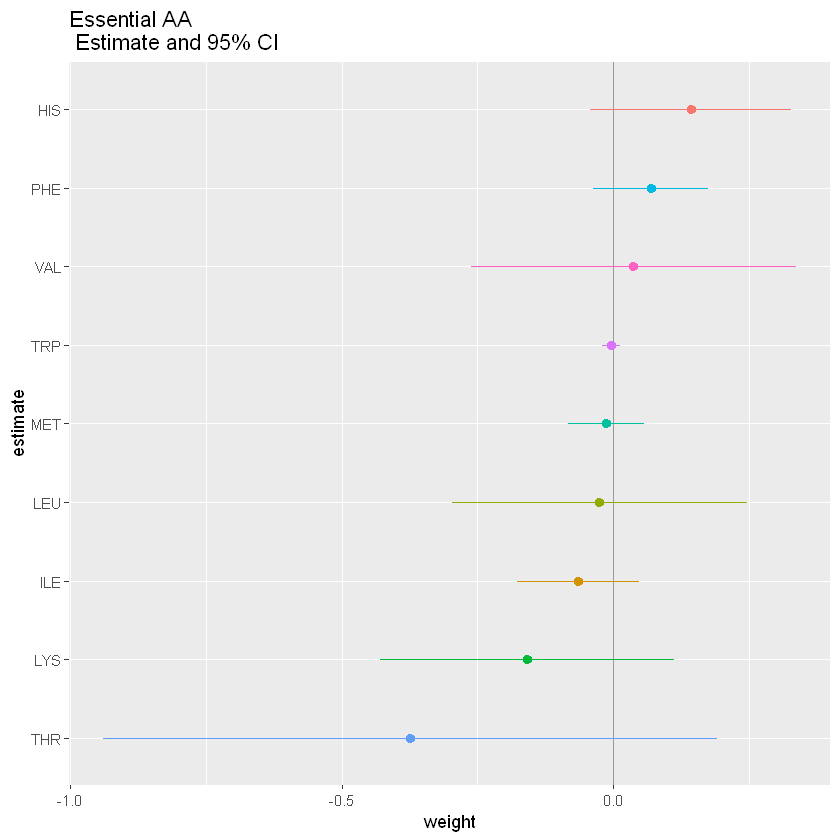

In [233]:
#png(filename="./plots/weight_E.png", units="cm", width=20, height=20, res = 300)
ggplot(weightCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI') + xlab('estimate') + ylab('weight')   
#dev.off()

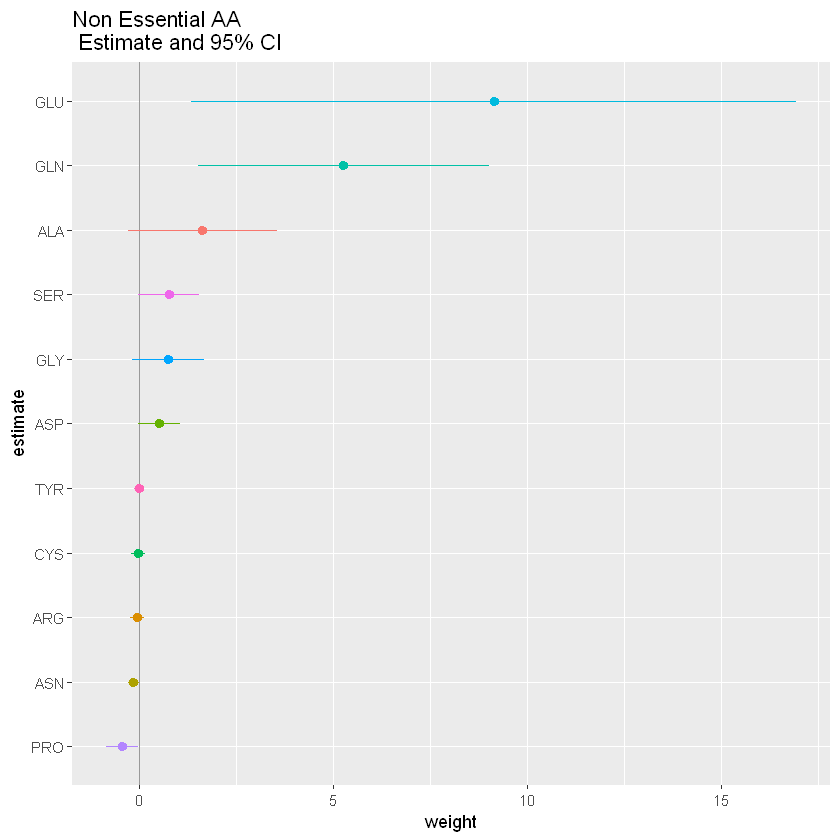

In [234]:
#png(filename="./plots/weight_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(weightCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + xlab('estimate') + ylab('weight')   
#dev.off()

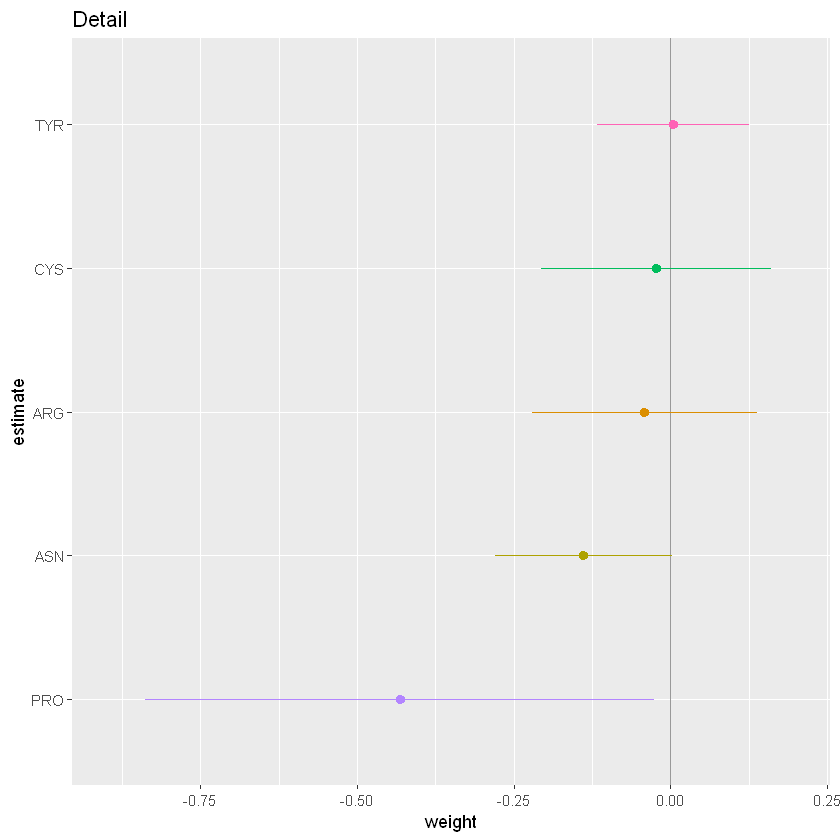

In [235]:
#png(filename="./plots/weight_NE_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(weightCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-0.9, 0.20), xlim = c(1, 5)) + 
    ggtitle('Detail') + xlab('estimate') + ylab('weight')   
#dev.off()


In [236]:
AA_E_Nested <- AA_E_Nested %>% mutate(model = me_E_HC, tidy = tidy_E_HC)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model = me_NE_HC, tidy = tidy_NE_HC)

In [237]:
headCoef_E <- bind_rows(tidy_E_HC) %>% filter(grepl("head", term))
headCoef_NE <- bind_rows(tidy_NE_HC) %>% filter(grepl("head", term))

headCoef_E
headCoef_NE

term,estimate,std.error,statistic,AA
head,0.111209766,0.052297933,2.1264658,HIS
head,0.052963534,0.033091367,1.6005242,ILE
head,0.084282443,0.076497320,1.1017699,LEU
head,-0.136979931,0.079527996,-1.7224115,LYS
head,0.015422154,0.020094739,0.7674722,MET
head,0.071149496,0.029570834,2.4060700,PHE
head,0.158398712,0.173909693,0.9108101,THR
head,0.001125387,0.004568146,0.2463553,TRP
head,0.264798218,0.086031964,3.0779051,VAL


term,estimate,std.error,statistic,AA
head,-0.09633369,0.05302874,-1.8166317,ARG
head,0.14311097,0.16209554,0.8828804,ASP
head,1.37205321,0.55787008,2.4594493,ALA
head,-0.04615979,0.04142477,-1.1143042,ASN
head,0.04043558,0.05473722,0.7387219,CYS
head,0.99077084,0.26566587,3.7293869,GLY
head,7.81724255,2.28108154,3.4269895,GLU
head,3.72412885,1.12573466,3.3081764,GLN
head,-0.15010396,0.12300533,-1.2203045,PRO
head,0.94334125,0.22733104,4.1496368,SER


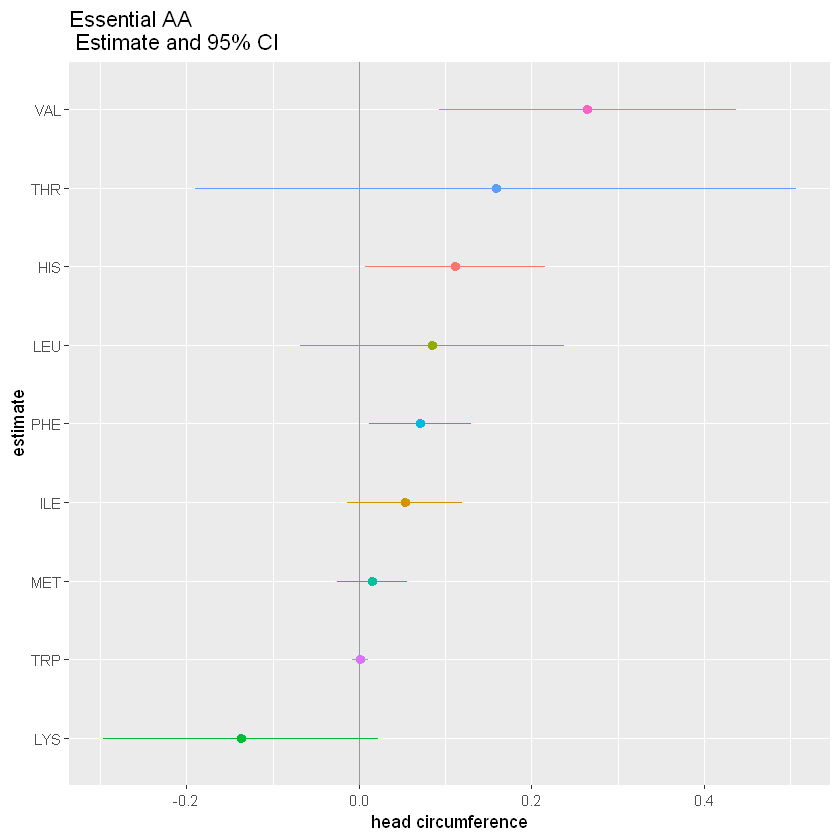

In [238]:
#png(filename="./plots/head_E.png", units="cm", width=20, height=20, res = 300)
ggplot(headCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI') + xlab('estimate') + ylab('head circumference')   
#dev.off()

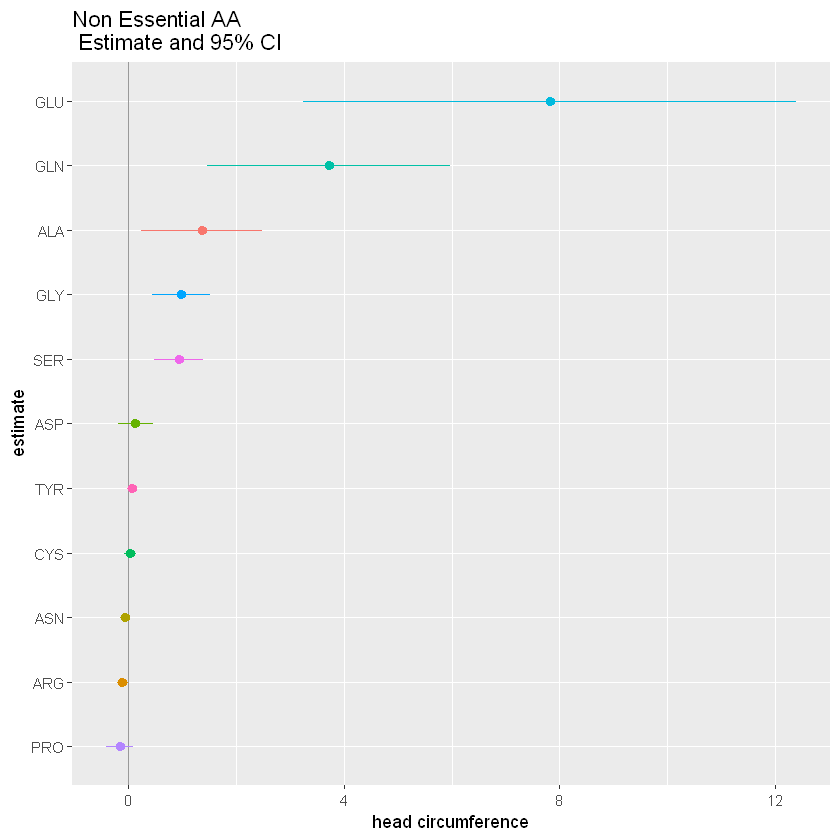

In [239]:
#png(filename="./plots/head_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(headCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + xlab('estimate') + ylab('head circumference')   
#dev.off()

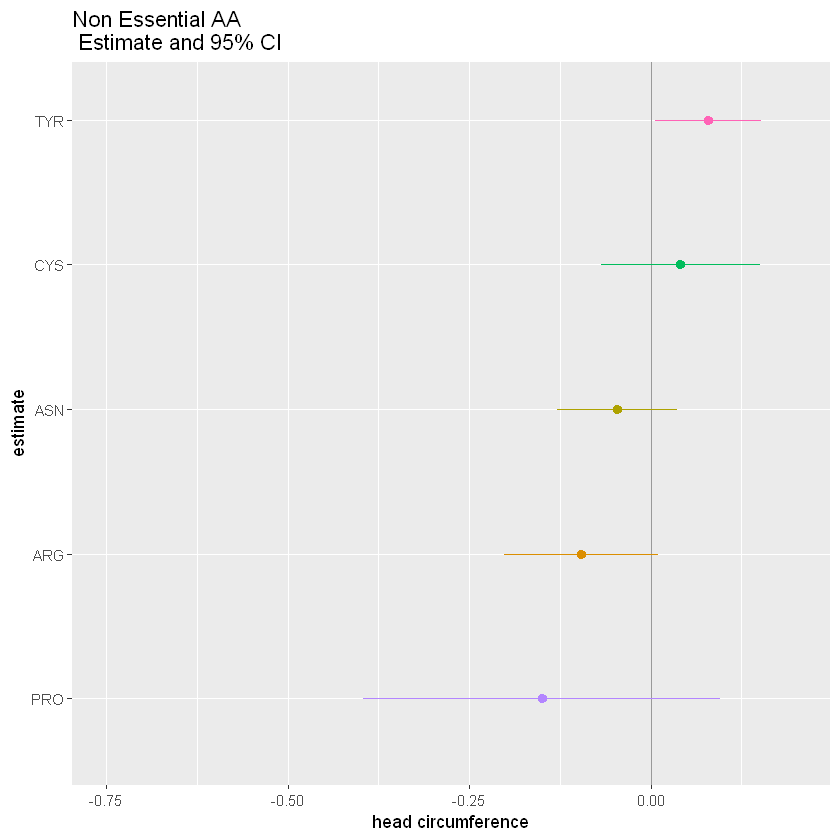

In [261]:
#png(filename="./plots/head_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(headCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-0.75, 0.20), xlim = c(1, 4.8)) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + xlab('estimate') + ylab('head circumference')   
#dev.off()

### sex controlling for size and weight 

In [241]:
sexCoef_E <- bind_rows(tidy_E_W) %>% filter(grepl("sex", term))
sexCoef_NE <- bind_rows(tidy_NE_W) %>% filter(grepl("sex", term))

sexCoef_E
sexCoef_NE

term,estimate,std.error,statistic,AA
sexboy,0.12460336,0.16811119,0.7411961,HIS
sexboy,0.05504230,0.11385017,0.4834626,ILE
sexboy,0.04795276,0.23314167,0.2056808,LEU
sexboy,0.15489128,0.24582451,0.6300888,LYS
sexboy,0.08511583,0.06428092,1.3241227,MET
sexboy,0.12021643,0.09179353,1.3096394,PHE
sexboy,-0.64723380,0.62998388,-1.0273815,THR
sexboy,0.01016903,0.01367592,0.7435715,TRP
sexboy,0.13540392,0.29070121,0.4657838,VAL


term,estimate,std.error,statistic,AA
sexboy,0.15158839,0.1750708,0.8658693,ARG
sexboy,0.30198659,0.5198514,0.5809094,ASP
sexboy,1.35318892,1.7530434,0.7719084,ALA
sexboy,0.05584087,0.1218386,0.4583183,ASN
sexboy,0.31957951,0.1779794,1.7955979,CYS
sexboy,1.87421943,0.8969746,2.0894899,GLY
sexboy,11.27856208,7.4399023,1.5159557,GLU
sexboy,3.65616486,3.6031770,1.0147059,GLN
sexboy,0.29679944,0.4090418,0.7255968,PRO
sexboy,1.45270901,0.7701627,1.8862365,SER


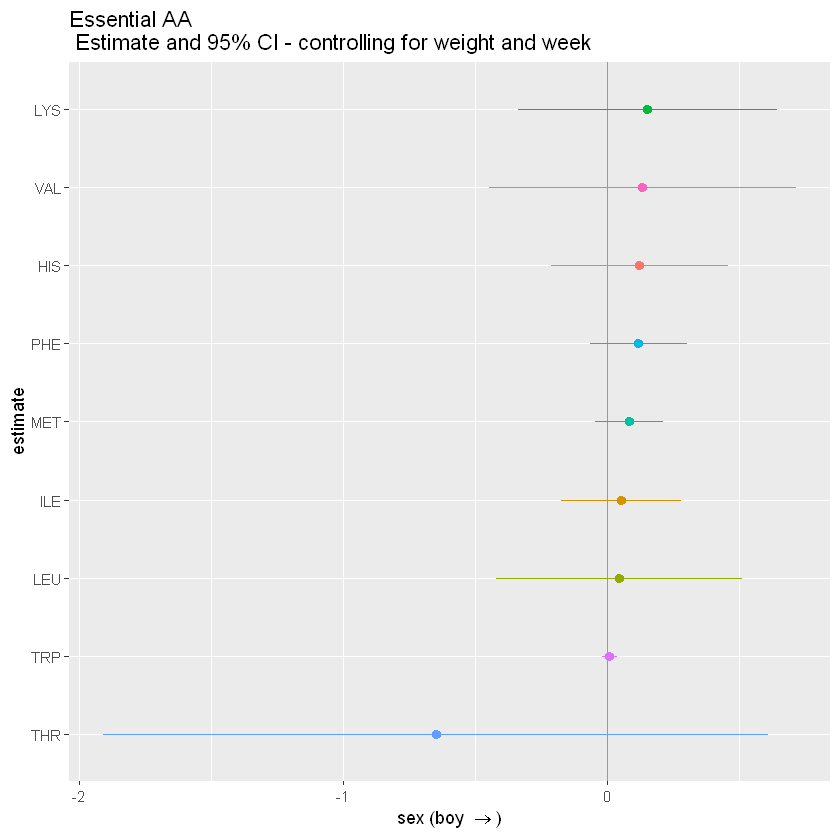

In [272]:
#png(filename="./plots/sex_E.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI - controlling for weight and week') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

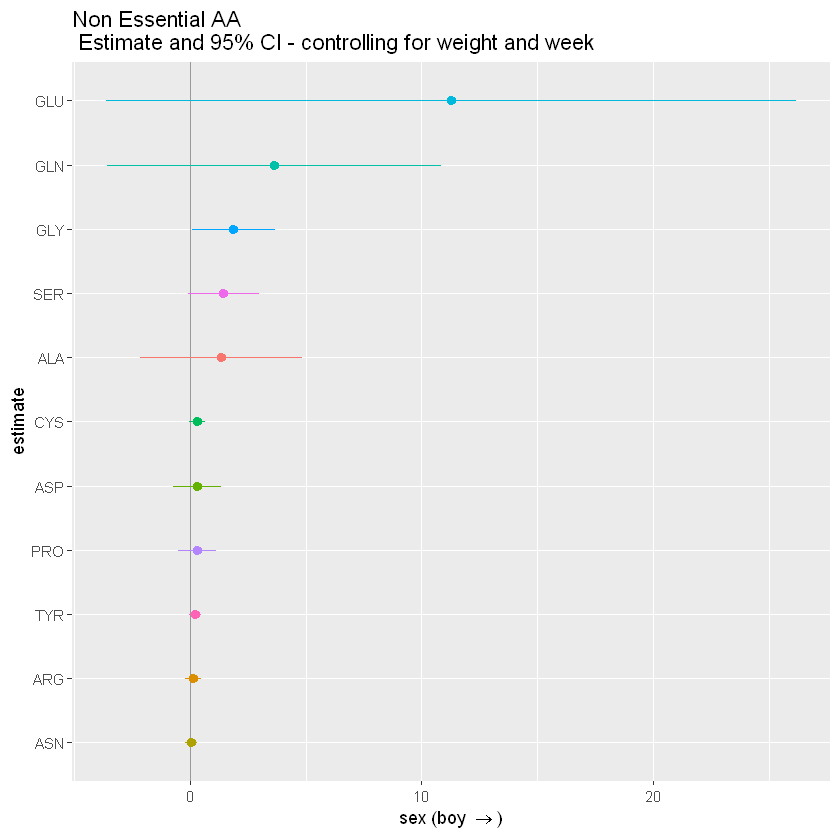

In [273]:
#png(filename="./plots/sex_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA \n Estimate and 95% CI - controlling for weight and week') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

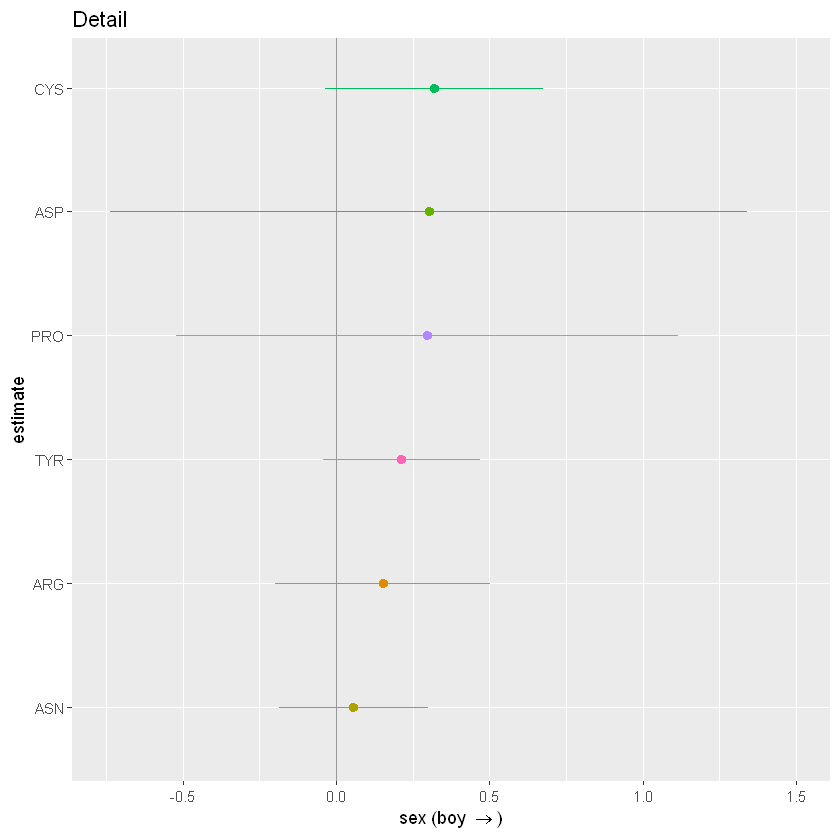

In [269]:
#png(filename="./plots/sex_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-0.75, 1.5), xlim = c(1, 5.8)) + 
    ggtitle('Detail') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

In [271]:
sexCoef_E_HC <- bind_rows(tidy_E_HC) %>% filter(grepl("sex", term))
sexCoef_NE_HC <- bind_rows(tidy_NE_HC) %>% filter(grepl("sex", term))

sexCoef_E_HC
sexCoef_NE_HC

term,estimate,std.error,statistic,AA
sexboy,0.033653895,0.16654079,0.20207598,HIS
sexboy,0.029099657,0.11118122,0.26173176,ILE
sexboy,-0.007958073,0.23761662,-0.03349123,LEU
sexboy,0.226094656,0.26104797,0.86610387,LYS
sexboy,0.072466361,0.06371412,1.13736728,MET
sexboy,0.084390439,0.09147499,0.92255208,PHE
sexboy,-0.751393945,0.64337250,-1.16789875,THR
sexboy,0.009723059,0.01378500,0.70533624,TRP
sexboy,-0.010395363,0.29036672,-0.03580081,VAL


term,estimate,std.error,statistic,AA
sexboy,0.2065960,0.1842581,1.1212316,ARG
sexboy,0.1230930,0.5403108,0.2278189,ASP
sexboy,0.2120318,1.8293545,0.1159053,ALA
sexboy,0.0800377,0.1280958,0.6248266,ASN
sexboy,0.2989439,0.1869555,1.5990110,CYS
sexboy,1.1919557,0.9086241,1.3118250,GLY
sexboy,5.5436361,7.7833029,0.7122472,GLU
sexboy,1.3919164,3.8663011,0.3600124,GLN
sexboy,0.4135682,0.4249354,0.9732495,PRO
sexboy,0.8979458,0.7890213,1.1380501,SER


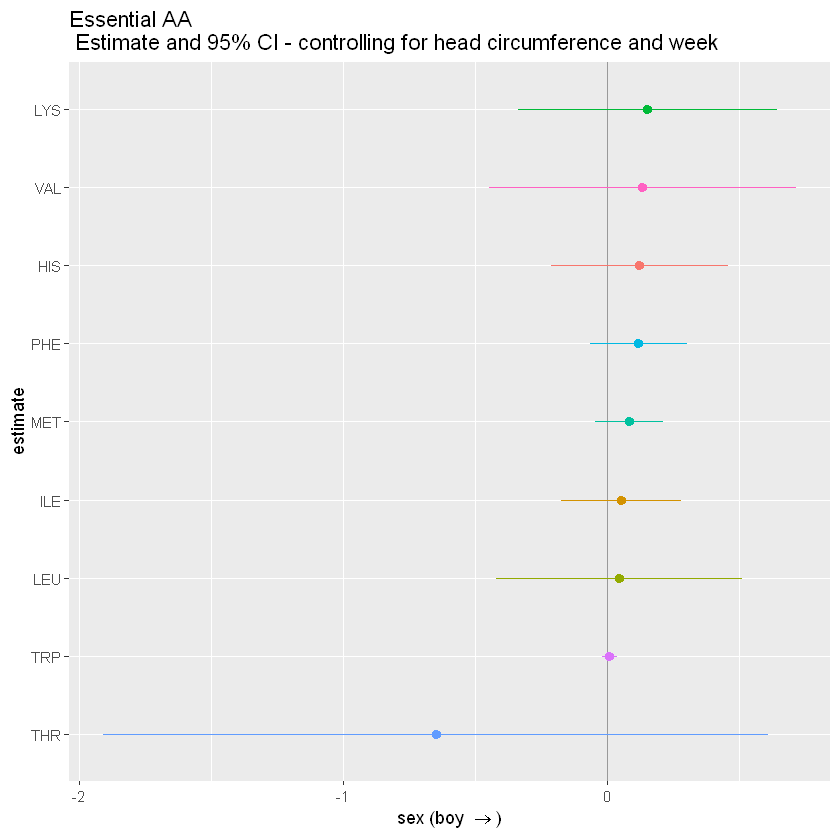

In [274]:
#png(filename="./plots/sex_E_HC.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI - controlling for head circumference and week') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

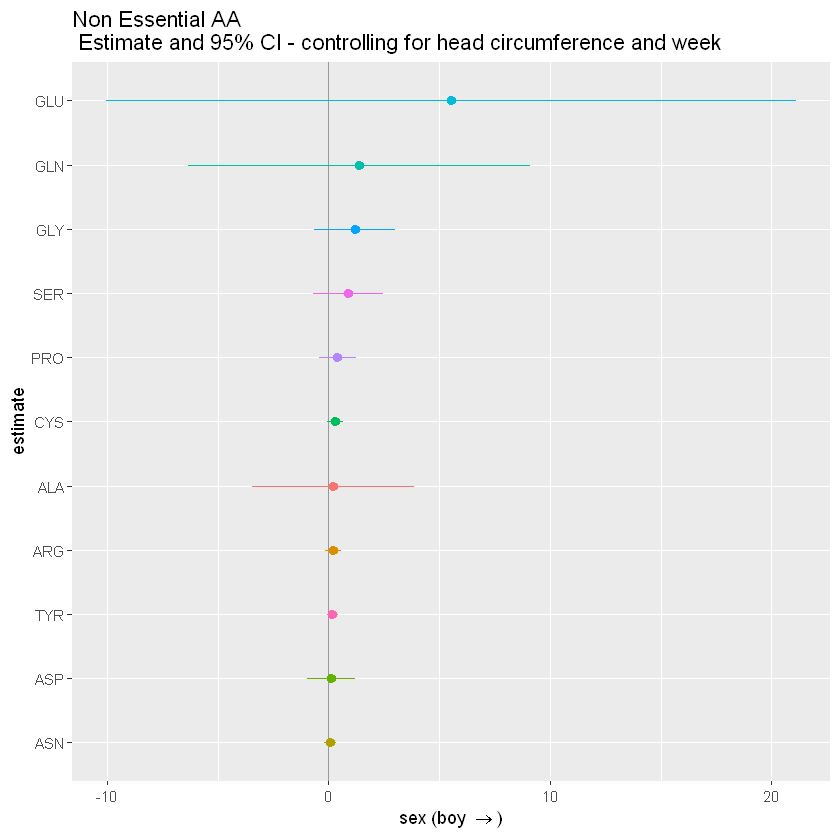

In [275]:
#png(filename="./plots/sex_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_HC, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA \n Estimate and 95% CI - controlling for head circumference and week') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

## Group and Free AA levels

In [38]:
table = table( AA_E %>% select(sex, group)) 
print(table)

      group
sex    teen adult
  girl   13    13
  boy    24    11


Teen mothers have almost twice the number of boys: 24 boys and 13 girls. Is there an assosiation between group and sex? 


$H_0:$ group and sex are independent.

In [37]:
print(chisq.test(table))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table
X-squared = 1.448, df = 1, p-value = 0.2288



$P(independence) \approx 0.23$ 

### The model: 

$AA = \alpha_0 + \alpha_1 \ group + \alpha_2 \ sex + \alpha_{id}$